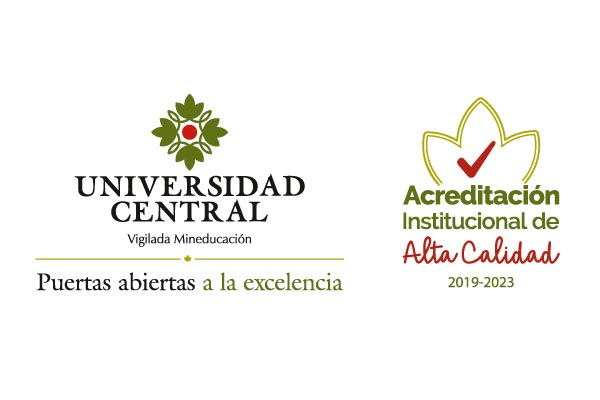

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import xlwt
import json
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import itertools
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_recall_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report
keras.__version__

'2.9.0'

# Creación de las carpetas

In [21]:
path='C:/Users/linar/Documents/Tesis/Dataset'
clases = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","1","2","3","4","5","6","7","8","9","10","Aeropuerto","Amor","Ayuda","Banco","Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Transmilenio","Palabras"]
for i in clases:
    datos=os.path.join(path, i)
    os.mkdir(datos)

In [53]:
ImgLocation=r"C:\Users\linar\Documents\Tesis\Numeros\numeros 2\numeros"
directorio_n=r"C:\Users\linar\Documents\Tesis\Dataset"
clases = ["Aeropuerto","Amor","Ayuda","Banco","Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Transmilenio","Palabras"]
i=0
for clase in clases:
    original_dataset_dir = ImgLocation
    pngfiles = list(filter(lambda f: f.endswith('.png') or f.endswith('.jpg'), list(os.listdir(original_dataset_dir))))
   
    while pngfiles[i][0]==clase:
        src = os.path.join(original_dataset_dir, pngfiles[i])
        dst = os.path.join(os.path.join(directorio_n, clase), pngfiles[i])
        shutil.copyfile(src, dst)   
        i=i+1       

estoy aqui  1
estoy aqui  2
estoy aqui  3
estoy aqui  4
estoy aqui  5
estoy aqui  6
estoy aqui  7
estoy aqui  8
estoy aqui  9


IndexError: list index out of range

# Entrenamiento de red convolucional (Todos los datos)

In [4]:
# Specify the location of images after you have downloaded them
ImgLocation="C:/Users/linar/Documents/Tesis/Dataset/"

# List image categories we are interested in
LABELS = set(clases)

# Create two lists to contain image paths and image labels
ImagePaths=[]
ListLabels=[]
for label in LABELS:
    for image in list(os.listdir(ImgLocation+label)):
        ImagePaths=ImagePaths+[ImgLocation+label+"/"+image]
        ListLabels=ListLabels+[label]
        
print(ListLabels)

['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',

In [5]:
# El directorio donde se almacenara nuestro conjunto de datos más pequeño
base_dir = 'C:/Users/linar/Documents/Tesis/Dataset/datos'
os.mkdir(base_dir)
#try:
#    os.mkdir(base_dir)
#except:
    #shutil.rmtree(base_dir, ignore_errors=True)
    #os.mkdir(base_dir)

# Directorios para nuestras divisiones de validación y prueba
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directorio para nuestras imágenes de entrenamiento, validación y pruebas de Infectados y No infectados
for clase in clases:
    train_Sub_dir = os.path.join(train_dir, clase)
    os.mkdir(train_Sub_dir)
    validation_Sub_dir = os.path.join(validation_dir, clase)
    os.mkdir(validation_Sub_dir)
    test_Sub_dir = os.path.join(test_dir, clase)
    os.mkdir(test_Sub_dir)

In [91]:
validation_Sub_dir

'C:/Users/linar/Documents/Tesis/Dataset/datos\\validation\\Transmilenio'

In [6]:
original_dataset_dir = "C:/Users/linar/Documents/Tesis/Dataset/A"
pngfiles = list(filter(lambda f: f.endswith('.png') or f.endswith('.jpg'), list(os.listdir(original_dataset_dir))))
cantidadImagenes = len(pngfiles)
print(cantidadImagenes)
trainSize = round(0.6 * cantidadImagenes)
valSize = round(0.2 * cantidadImagenes)
testSize = round(0.2 * cantidadImagenes)
print(str(trainSize) + " - " + str(valSize) + " - " + str(testSize))
print(trainSize+ valSize+ testSize)

900
540 - 180 - 180
900


In [7]:
for clase in clases:
    original_dataset_dir = r"C:/Users/linar/Documents/Tesis/Dataset/"+ clase
    pngfiles = list(filter(lambda f: f.endswith('.png') or f.endswith('.jpg'), list(os.listdir(original_dataset_dir))))
    rd.seed(2022)
    rd.shuffle(pngfiles)
    initial_count = 0
    for imagen in pngfiles:
        if initial_count< trainSize:
            src = os.path.join(original_dataset_dir, imagen)
            dst = os.path.join(os.path.join(train_dir, clase), imagen)
            shutil.copyfile(src, dst)
            initial_count += 1
        elif initial_count>= trainSize and initial_count< (trainSize+ valSize):
            src = os.path.join(original_dataset_dir, imagen)
            dst = os.path.join(os.path.join(validation_dir, clase), imagen)
            shutil.copyfile(src, dst)
            initial_count += 1
        else:
            src = os.path.join(original_dataset_dir, imagen)
            dst = os.path.join(os.path.join(test_dir, clase), imagen)
            shutil.copyfile(src, dst)
            initial_count += 1
print('Directorios armados correctamente')

Directorios armados correctamente


In [34]:
def grafica(H):
    plt.figure(figsize=(16,10))  
    plt.subplot(2,2,1)
    plt.plot(H.history['acc'],'r', label='accuracy') 
    plt.plot(H.history['val_acc'],label='val_accuracy')  
    plt.rcParams['figure.figsize'] = (4, 3)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Accuracy")  
    plt.title("Accuracy")  
    plt.legend(loc="lower right")
    plt.subplot(2,2,2) 
    for key in H.history.keys():   # iter on both keys and values
        if key.startswith('prec'):
            prec = H.history[key]
    for key in H.history.keys():   # iter on both keys and values
        if key.startswith('val_prec'):
            val_prec = H.history[key]
    plt.plot(prec,'r',label='precision') 
    plt.plot(val_prec,label='val_precision') 
    plt.rcParams['figure.figsize'] = (4, 3)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Precision")  
    plt.title("Precision")  
    plt.legend(loc="lower right")
    plt.subplot(2,2,3) 
    plt.plot(H.history['loss'],'r',label='loss') 
    plt.plot(H.history['val_loss'],label='val_loss') 
    plt.rcParams['figure.figsize'] = (4, 3)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Loss")  
    plt.title("Loss")  
    plt.legend(loc="upper right")
    plt.show()  
    return


Found 25380 images belonging to 47 classes.
Found 8460 images belonging to 47 classes.
Params_Model - Activación:relu cellsize:3 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 34s 646ms/step - loss: 0.1816 - acc: 0.0260 - precision: 0.0000e+00 - val_loss: 0.1113 - val_acc: 0.0190 - val_precision: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 26s 510ms/step - loss: 0.1103 - acc: 0.0180 - precision: 0.0000e+00 - val_loss: 0.1110 - val_acc: 0.0300 - val_precision: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 24s 484ms/step - loss: 0.1100 - acc: 0.0320 - precision: 0.0000e+00 - val_loss: 0.1090 - val_acc: 0.0230 - val_precision: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 23s 467ms/step - loss: 0.1082 - acc: 0.0390 - precision: 0.0000e+00 - val_loss: 0.1064 - val_acc: 0.0260 - val_precision: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 30s 584ms/step - loss: 0.1048 - acc: 0.0400 - precision: 0.0000e

Epoch 46/70
50/50 [==============================] - 24s 480ms/step - loss: 0.0364 - acc: 0.6930 - precision: 0.8884 - val_loss: 0.0351 - val_acc: 0.7130 - val_precision: 0.8948
Epoch 47/70
50/50 [==============================] - 24s 476ms/step - loss: 0.0337 - acc: 0.7030 - precision: 0.8884 - val_loss: 0.0332 - val_acc: 0.7050 - val_precision: 0.9131
Epoch 48/70
50/50 [==============================] - 25s 495ms/step - loss: 0.0321 - acc: 0.7190 - precision: 0.8858 - val_loss: 0.0356 - val_acc: 0.6950 - val_precision: 0.8754
Epoch 49/70
50/50 [==============================] - 25s 491ms/step - loss: 0.0337 - acc: 0.7290 - precision: 0.8987 - val_loss: 0.0337 - val_acc: 0.7200 - val_precision: 0.9056
Epoch 50/70
50/50 [==============================] - 25s 496ms/step - loss: 0.0338 - acc: 0.7040 - precision: 0.8904 - val_loss: 0.0317 - val_acc: 0.7190 - val_precision: 0.8895
Epoch 51/70
50/50 [==============================] - 25s 492ms/step - loss: 0.0318 - acc: 0.7280 - precision: 

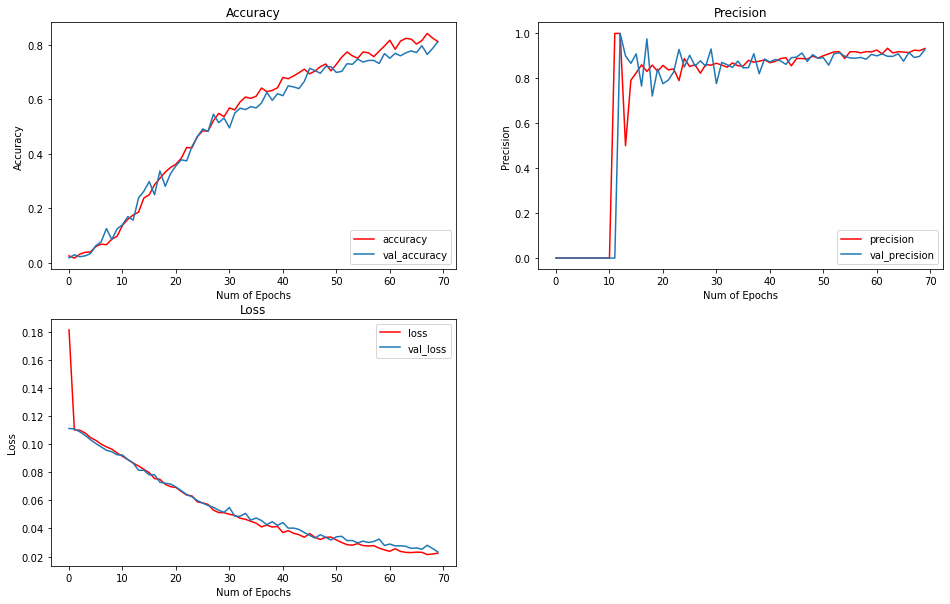

Params_Model - Activación:relu cellsize:3 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 41s 398ms/step - loss: 0.1362 - acc: 0.0235 - precision_1: 0.0000e+00 - val_loss: 0.1098 - val_acc: 0.0190 - val_precision_1: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 37s 370ms/step - loss: 0.1087 - acc: 0.0300 - precision_1: 0.0000e+00 - val_loss: 0.1059 - val_acc: 0.0300 - val_precision_1: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 38s 383ms/step - loss: 0.1042 - acc: 0.0480 - precision_1: 0.0000e+00 - val_loss: 0.1014 - val_acc: 0.0490 - val_precision_1: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 38s 377ms/step - loss: 0.0985 - acc: 0.0765 - precision_1: 0.0000e+00 - val_loss: 0.0986 - val_acc: 0.0680 - val_precision_1: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 37s 367ms/step - loss: 0.0944 - acc: 0.1090 - precision_1: 0.0000e+00 - val_loss: 0.0913 - val_acc: 0.1410 - val_precision_1

100/100 [==============================] - 40s 399ms/step - loss: 0.0135 - acc: 0.9080 - precision_1: 0.9558 - val_loss: 0.0199 - val_acc: 0.8490 - val_precision_1: 0.9114
Epoch 46/70
100/100 [==============================] - 41s 413ms/step - loss: 0.0132 - acc: 0.9025 - precision_1: 0.9529 - val_loss: 0.0181 - val_acc: 0.8510 - val_precision_1: 0.9372
Epoch 47/70
100/100 [==============================] - 42s 419ms/step - loss: 0.0128 - acc: 0.9115 - precision_1: 0.9494 - val_loss: 0.0151 - val_acc: 0.8890 - val_precision_1: 0.9303
Epoch 48/70
100/100 [==============================] - 40s 403ms/step - loss: 0.0121 - acc: 0.9240 - precision_1: 0.9624 - val_loss: 0.0229 - val_acc: 0.8340 - val_precision_1: 0.8856
Epoch 49/70
100/100 [==============================] - 42s 418ms/step - loss: 0.0126 - acc: 0.9150 - precision_1: 0.9583 - val_loss: 0.0195 - val_acc: 0.8530 - val_precision_1: 0.9104
Epoch 50/70
100/100 [==============================] - 41s 407ms/step - loss: 0.0120 - acc: 

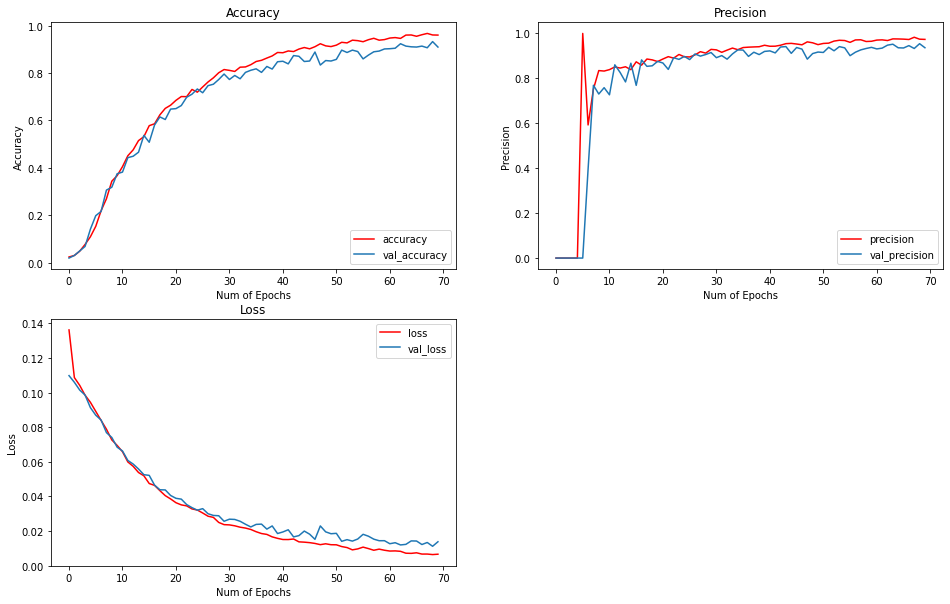

Params_Model - Activación:relu cellsize:5 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 30s 568ms/step - loss: 0.1680 - acc: 0.0160 - precision_2: 0.0000e+00 - val_loss: 0.1171 - val_acc: 0.0190 - val_precision_2: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 29s 575ms/step - loss: 0.1134 - acc: 0.0250 - precision_2: 0.0000e+00 - val_loss: 0.1160 - val_acc: 0.0250 - val_precision_2: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 29s 575ms/step - loss: 0.1131 - acc: 0.0230 - precision_2: 0.0000e+00 - val_loss: 0.1127 - val_acc: 0.0180 - val_precision_2: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 29s 573ms/step - loss: 0.1111 - acc: 0.0330 - precision_2: 0.0000e+00 - val_loss: 0.1120 - val_acc: 0.0270 - val_precision_2: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 28s 559ms/step - loss: 0.1097 - acc: 0.0320 - precision_2: 0.0000e+00 - val_loss: 0.1066 - val_acc: 0.0290 - val_precision_2: 0.0000e+0

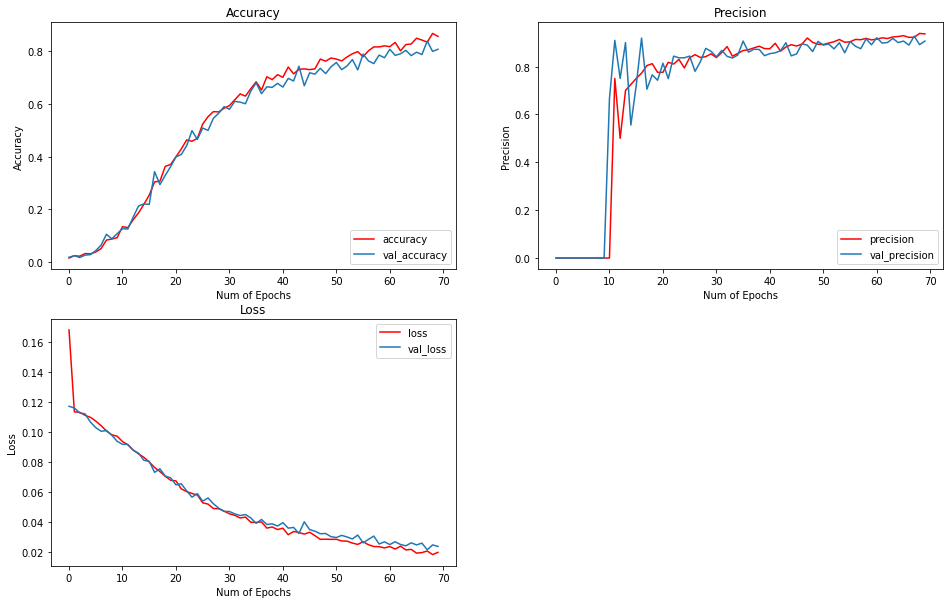

Params_Model - Activación:relu cellsize:5 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 63s 619ms/step - loss: 0.1377 - acc: 0.0185 - precision_3: 0.0000e+00 - val_loss: 0.1120 - val_acc: 0.0170 - val_precision_3: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 62s 623ms/step - loss: 0.1119 - acc: 0.0265 - precision_3: 0.0000e+00 - val_loss: 0.1180 - val_acc: 0.0210 - val_precision_3: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 62s 617ms/step - loss: 0.1087 - acc: 0.0355 - precision_3: 0.0000e+00 - val_loss: 0.1052 - val_acc: 0.0430 - val_precision_3: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 60s 600ms/step - loss: 0.1039 - acc: 0.0550 - precision_3: 0.0000e+00 - val_loss: 0.1022 - val_acc: 0.0800 - val_precision_3: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 62s 612ms/step - loss: 0.0984 - acc: 0.0820 - precision_3: 0.0000e+00 - val_loss: 0.0970 - val_acc: 0.0520 - val_precision_3

Epoch 45/70
100/100 [==============================] - 63s 630ms/step - loss: 0.0137 - acc: 0.8925 - precision_3: 0.9552 - val_loss: 0.0209 - val_acc: 0.8440 - val_precision_3: 0.9011
Epoch 46/70
100/100 [==============================] - 59s 589ms/step - loss: 0.0129 - acc: 0.9040 - precision_3: 0.9477 - val_loss: 0.0179 - val_acc: 0.8560 - val_precision_3: 0.9043
Epoch 47/70
100/100 [==============================] - 60s 604ms/step - loss: 0.0126 - acc: 0.9100 - precision_3: 0.9522 - val_loss: 0.0180 - val_acc: 0.8600 - val_precision_3: 0.9158
Epoch 48/70
100/100 [==============================] - 64s 637ms/step - loss: 0.0124 - acc: 0.9085 - precision_3: 0.9541 - val_loss: 0.0185 - val_acc: 0.8620 - val_precision_3: 0.9204
Epoch 49/70
100/100 [==============================] - 16556s 167s/step - loss: 0.0119 - acc: 0.9135 - precision_3: 0.9545 - val_loss: 0.0178 - val_acc: 0.8680 - val_precision_3: 0.9179
Epoch 50/70
100/100 [==============================] - 60s 599ms/step - loss: 

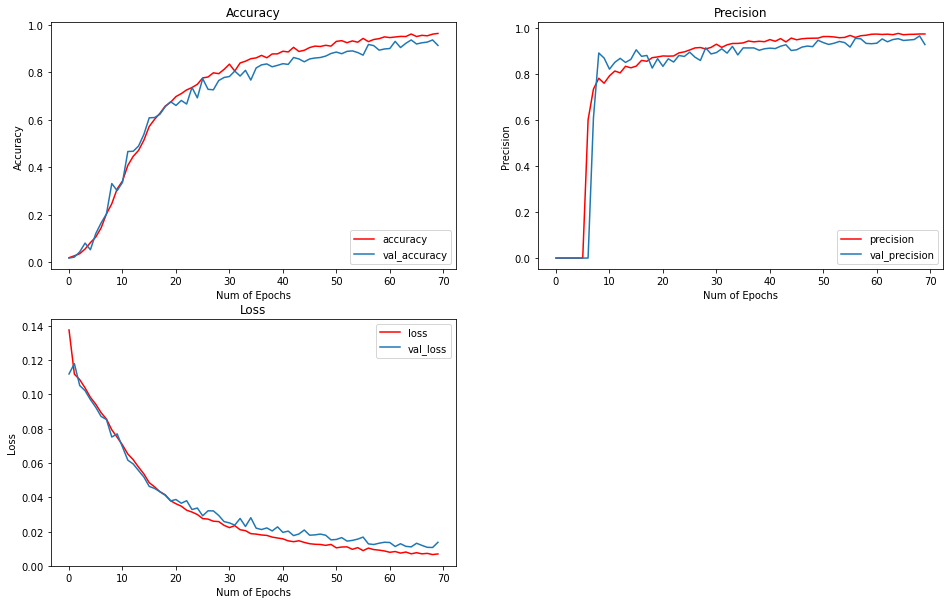

Params_Model - Activación:tanh cellsize:3 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 26s 494ms/step - loss: 0.1572 - acc: 0.0260 - precision_4: 0.0000e+00 - val_loss: 0.1126 - val_acc: 0.0200 - val_precision_4: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 24s 483ms/step - loss: 0.1068 - acc: 0.0290 - precision_4: 0.0000e+00 - val_loss: 0.1042 - val_acc: 0.0280 - val_precision_4: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 24s 482ms/step - loss: 0.1035 - acc: 0.0240 - precision_4: 0.0000e+00 - val_loss: 0.1026 - val_acc: 0.0440 - val_precision_4: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 24s 489ms/step - loss: 0.1023 - acc: 0.0370 - precision_4: 0.0000e+00 - val_loss: 0.1015 - val_acc: 0.0350 - val_precision_4: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 24s 487ms/step - loss: 0.1010 - acc: 0.0400 - precision_4: 0.0000e+00 - val_loss: 0.0999 - val_acc: 0.0400 - val_precision_4: 0.0000e+0

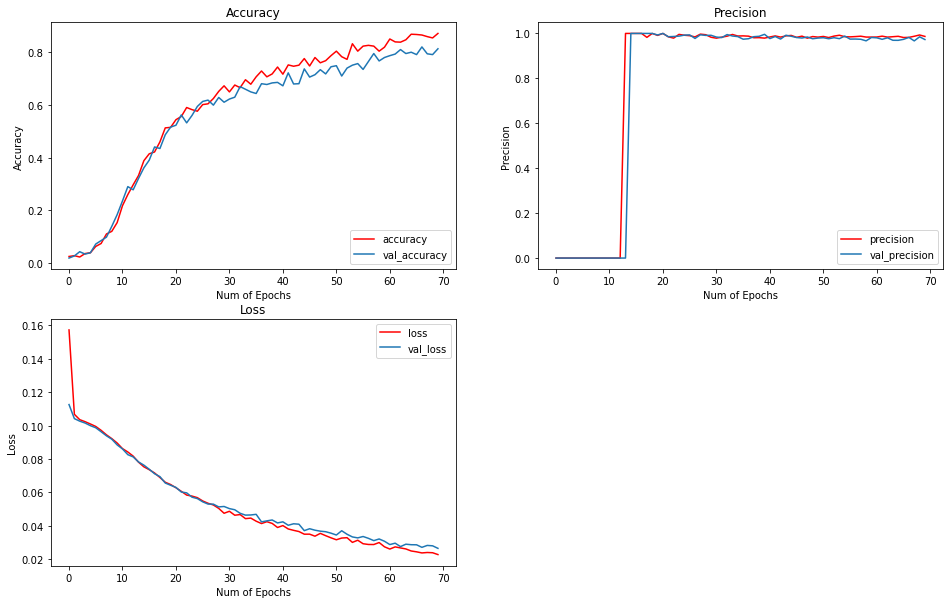

Params_Model - Activación:tanh cellsize:3 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 41s 396ms/step - loss: 0.1295 - acc: 0.0260 - precision_5: 0.0000e+00 - val_loss: 0.1041 - val_acc: 0.0520 - val_precision_5: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 38s 383ms/step - loss: 0.1026 - acc: 0.0340 - precision_5: 0.0000e+00 - val_loss: 0.1015 - val_acc: 0.0330 - val_precision_5: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 39s 385ms/step - loss: 0.0995 - acc: 0.0650 - precision_5: 0.0000e+00 - val_loss: 0.0976 - val_acc: 0.0820 - val_precision_5: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 38s 379ms/step - loss: 0.0942 - acc: 0.1170 - precision_5: 0.0000e+00 - val_loss: 0.0917 - val_acc: 0.1740 - val_precision_5: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 39s 389ms/step - loss: 0.0878 - acc: 0.2110 - precision_5: 0.0000e+00 - val_loss: 0.0858 - val_acc: 0.2380 - val_precision_5

Epoch 45/70
100/100 [==============================] - 47s 469ms/step - loss: 0.0157 - acc: 0.9220 - precision_5: 0.9793 - val_loss: 0.0186 - val_acc: 0.8920 - val_precision_5: 0.9827
Epoch 46/70
100/100 [==============================] - 48s 482ms/step - loss: 0.0150 - acc: 0.9220 - precision_5: 0.9868 - val_loss: 0.0177 - val_acc: 0.8950 - val_precision_5: 0.9782
Epoch 47/70
100/100 [==============================] - 48s 484ms/step - loss: 0.0142 - acc: 0.9355 - precision_5: 0.9848 - val_loss: 0.0185 - val_acc: 0.8870 - val_precision_5: 0.9709
Epoch 48/70
100/100 [==============================] - 48s 481ms/step - loss: 0.0133 - acc: 0.9440 - precision_5: 0.9916 - val_loss: 0.0165 - val_acc: 0.9060 - val_precision_5: 0.9798
Epoch 49/70
100/100 [==============================] - 50s 503ms/step - loss: 0.0128 - acc: 0.9400 - precision_5: 0.9905 - val_loss: 0.0165 - val_acc: 0.9040 - val_precision_5: 0.9664
Epoch 50/70
100/100 [==============================] - 49s 491ms/step - loss: 0.

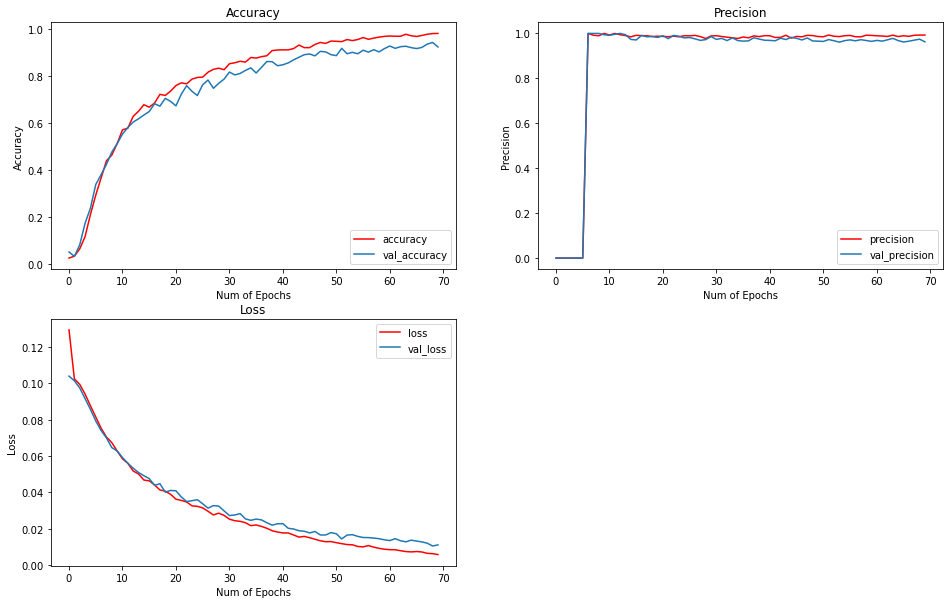

Params_Model - Activación:tanh cellsize:5 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 33s 604ms/step - loss: 0.1658 - acc: 0.0230 - precision_6: 0.0000e+00 - val_loss: 0.1171 - val_acc: 0.0130 - val_precision_6: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 30s 607ms/step - loss: 0.1089 - acc: 0.0240 - precision_6: 0.0000e+00 - val_loss: 0.1048 - val_acc: 0.0300 - val_precision_6: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 31s 616ms/step - loss: 0.1039 - acc: 0.0200 - precision_6: 0.0000e+00 - val_loss: 0.1032 - val_acc: 0.0240 - val_precision_6: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 29s 584ms/step - loss: 0.1033 - acc: 0.0170 - precision_6: 0.0000e+00 - val_loss: 0.1028 - val_acc: 0.0310 - val_precision_6: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 31s 619ms/step - loss: 0.1028 - acc: 0.0240 - precision_6: 0.0000e+00 - val_loss: 0.1022 - val_acc: 0.0240 - val_precision_6: 0.0000e+0

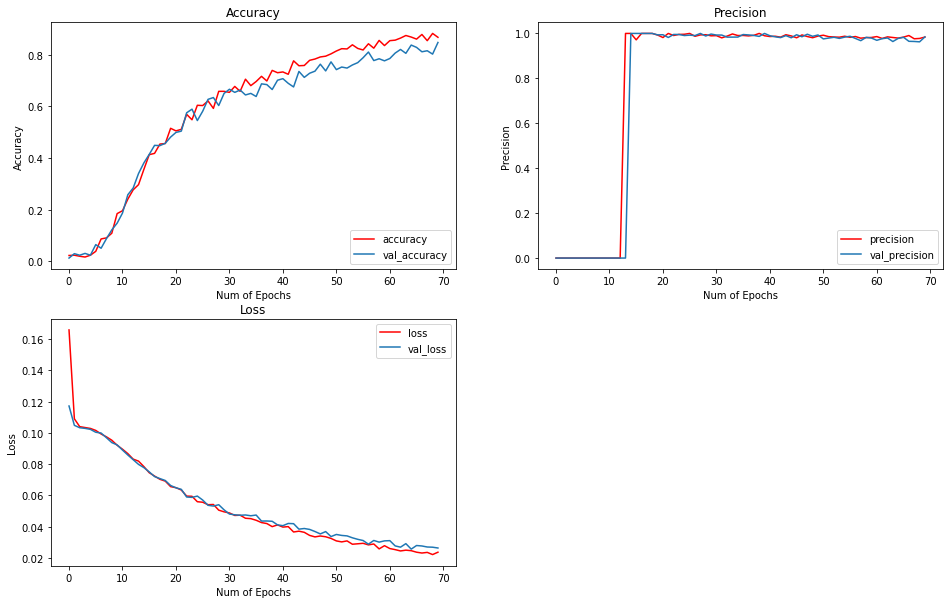

Params_Model - Activación:tanh cellsize:5 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 82s 803ms/step - loss: 0.1386 - acc: 0.0170 - precision_7: 0.0000e+00 - val_loss: 0.1048 - val_acc: 0.0270 - val_precision_7: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 76s 763ms/step - loss: 0.1035 - acc: 0.0185 - precision_7: 0.0000e+00 - val_loss: 0.1028 - val_acc: 0.0320 - val_precision_7: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 63s 629ms/step - loss: 0.1013 - acc: 0.0475 - precision_7: 0.0000e+00 - val_loss: 0.0993 - val_acc: 0.0940 - val_precision_7: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 64s 643ms/step - loss: 0.0974 - acc: 0.0820 - precision_7: 0.0000e+00 - val_loss: 0.0952 - val_acc: 0.1080 - val_precision_7: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 64s 635ms/step - loss: 0.0925 - acc: 0.1450 - precision_7: 0.0000e+00 - val_loss: 0.0901 - val_acc: 0.1380 - val_precision_7

Epoch 45/70
100/100 [==============================] - 62s 616ms/step - loss: 0.0167 - acc: 0.9220 - precision_7: 0.9809 - val_loss: 0.0219 - val_acc: 0.8520 - val_precision_7: 0.9702
Epoch 46/70
100/100 [==============================] - 61s 615ms/step - loss: 0.0163 - acc: 0.9155 - precision_7: 0.9782 - val_loss: 0.0201 - val_acc: 0.8780 - val_precision_7: 0.9717
Epoch 47/70
100/100 [==============================] - 61s 607ms/step - loss: 0.0157 - acc: 0.9250 - precision_7: 0.9885 - val_loss: 0.0185 - val_acc: 0.8860 - val_precision_7: 0.9667
Epoch 48/70
100/100 [==============================] - 63s 626ms/step - loss: 0.0142 - acc: 0.9330 - precision_7: 0.9869 - val_loss: 0.0193 - val_acc: 0.8700 - val_precision_7: 0.9696
Epoch 49/70
100/100 [==============================] - 61s 612ms/step - loss: 0.0148 - acc: 0.9270 - precision_7: 0.9809 - val_loss: 0.0172 - val_acc: 0.8970 - val_precision_7: 0.9706
Epoch 50/70
100/100 [==============================] - 61s 610ms/step - loss: 0.

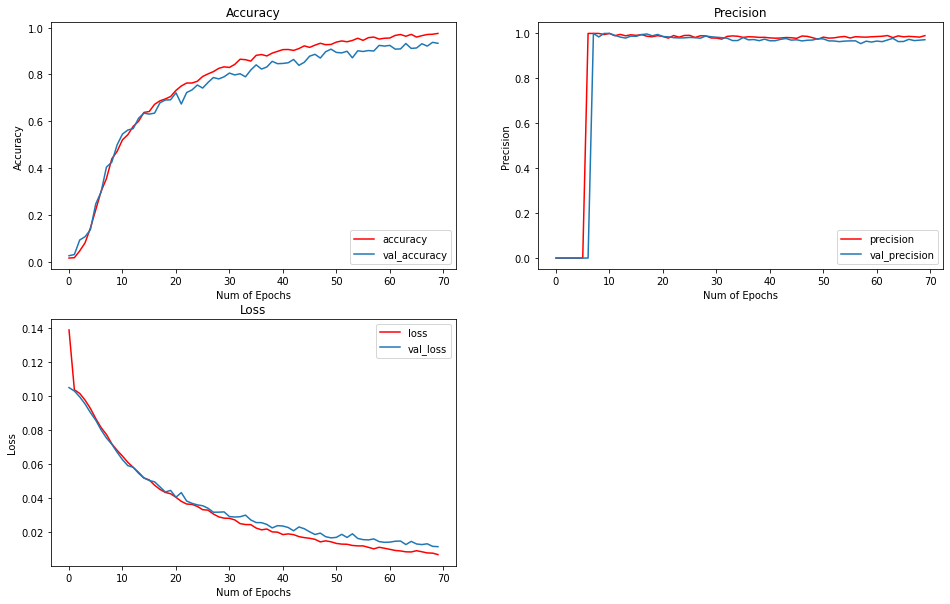

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import xlwt
import json
workbook = xlwt.Workbook()   
sheet = workbook.add_sheet("Busqueda_En_Grilla")
style = xlwt.easyxf('font: bold 1')
sheet.write(0, 0, 'MODEL_ID', style)
sheet.write(0, 1, 'AUTOENCODER_SUMMARY', style)
sheet.write(0, 2, 'Params', style)
sheet.write(0, 3, 'Metrics', style)

#[3,5]
#[10, 20, 30]
#['relu', 'tanh']
cellsizes = [3,5]
activations = ['relu', 'tanh']
steps_epochs = [50,100]


# Todas las imágenes serán reescaladas por 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Este es el directorio de destino
        train_dir,
        # Todas las imágenes cambiarán de tamaño a 150 x 150.
        target_size=(150, 150),
        batch_size=20,
        # Dado que usamos la pérdida binary_crossentropy, necesitamos etiquetas binarias
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model_id = 1
for activation in activations:
    for cellsize in cellsizes:
        for steps_epoch in steps_epochs:
            params = 'Params_Model - Activación:' + str(activation) + ' cellsize:' + str(cellsize) + ' steps_epoch:' + str(steps_epoch)
            print(params)
            model = models.Sequential()
            model.add(layers.Conv2D(32, (cellsize, cellsize), activation=activation, input_shape=(150, 150, 3)))
            model.add(layers.MaxPooling2D((2, 2)))
            model.add(layers.Conv2D(64, (cellsize, cellsize), activation=activation))
            model.add(layers.MaxPooling2D((2, 2)))
            model.add(layers.Conv2D(128, (cellsize, cellsize), activation=activation))
            model.add(layers.MaxPooling2D((2, 2)))
            model.add(layers.Conv2D(128, (cellsize, cellsize), activation=activation))
            model.add(layers.MaxPooling2D((2, 2)))
            
            model.add(layers.Flatten())
            model.add(layers.Dense(512, activation=activation))
            model.add(layers.Dense(256, activation=activation))
            model.add(layers.Dense(47, activation='softmax'))
            prec =tf.keras.metrics.Precision()
            model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc',prec])
            history = model.fit(
                  train_generator,
                  steps_per_epoch=steps_epoch,
                  epochs=70,
                  validation_data=validation_generator,
                  validation_steps=50)
            stringlist = []
            model.summary(print_fn=lambda x: stringlist.append(x))
            short_model_summary = "\n".join(stringlist)
            sheet.write(model_id, 0, model_id)
            sheet.write(model_id, 1, short_model_summary)
            sheet.write(model_id, 2, params)
            model.save('./models/Lenguaje_'+ str(model_id) + '.h5')
            sheet.write(model_id, 3, json.dumps(history.history))
            a = history.history['acc']
            b = history.history['val_acc']
            
            diferencia = [abs(e1 - e2) for e1, e2 in zip(a,b)]
            producto = [e1 * e2 for e1, e2 in zip(b,diferencia)]
            
            sheet.write(model_id, 4, json.dumps(diferencia))
            sheet.write(model_id, 5, json.dumps(producto))
            sheet.write(model_id, 6, json.dumps(b))
            tmp = min(producto)
            best_epoc = producto.index(tmp) + 1
            print(best_epoc)
            sheet.write(model_id, 7, best_epoc)
            grafica(history)
            workbook.save("Busqueda_En_Grilla_Lenguaje.xls")
            model_id += 1

# Matriz de confusión y métricas

In [2]:
def matriz_confusion(cm, classes, normalize=False,
                            title='Matriz de Confusión', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,fontsize=16)
    plt.yticks(tick_marks, classes,rotation=0,fontsize=16)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()

In [50]:
new_model = keras.models.load_model('.\models\Malaria_Model_ID_6.h5')


In [51]:
test_dir=r"C:\Users\linar\Documents\Tesis\Dataset\datos\test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

for data_batch, labels_batch in test_generator:
    print('Forma del lote de datos:', data_batch.shape)
    print('Forma del lote de etiquetas:', labels_batch.shape)
    break
#test_labels = extract_features(test_dir, 180*47)
#test_pred_prob=new_model.predict(test_generator)


Found 8481 images belonging to 47 classes.
Forma del lote de datos: (20, 150, 150, 3)
Forma del lote de etiquetas: (20, 47)


In [52]:
test_loss, test_accuracy, test_precision = new_model.evaluate(test_generator)

425/425 [==============================] - 54s 127ms/step - loss: 0.0106 - acc: 0.9397 - precision_5: 0.9708


In [53]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")

Test Loss:     0.010619918815791607
Test Accuracy: 0.93974769115448
Test Precision: 0.970794677734375


In [5]:
test_pred_prob=new_model.predict(test_generator)

425/425 [==============================] - 51s 120ms/step


In [6]:
predicted_classes = np.argmax(test_pred_prob, axis=1)
predicted_classes

array([ 0,  0,  0, ..., 46, 46, 46], dtype=int64)

In [18]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  


In [19]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       181
          10       1.00      1.00      1.00       181
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       181
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       181
           6       0.99      1.00      1.00       181
           7       1.00      0.99      1.00       181
           8       1.00      0.99      1.00       181
           9       0.99      1.00      1.00       181
           A       0.96      0.92      0.94       180
  Aeropuerto       1.00      1.00      1.00       181
        Amor       1.00      1.00      1.00       181
       Ayuda       1.00      1.00      1.00       181
           B       0.88      0.81      0.85       180
       Banco       1.00      1.00      1.00       181
           C       0.90      0.89      0.90       180
           D       0.78    

In [20]:
print(confusion_matrix(test_generator.classes, predicted_classes))

[[181   0   0 ...   0   0   0]
 [  0 181   0 ...   0   0   0]
 [  0   0 181 ...   0   0   0]
 ...
 [  0   0   0 ... 165   2   0]
 [  0   0   0 ...   0 167   3]
 [  0   0   0 ...   2   1 170]]


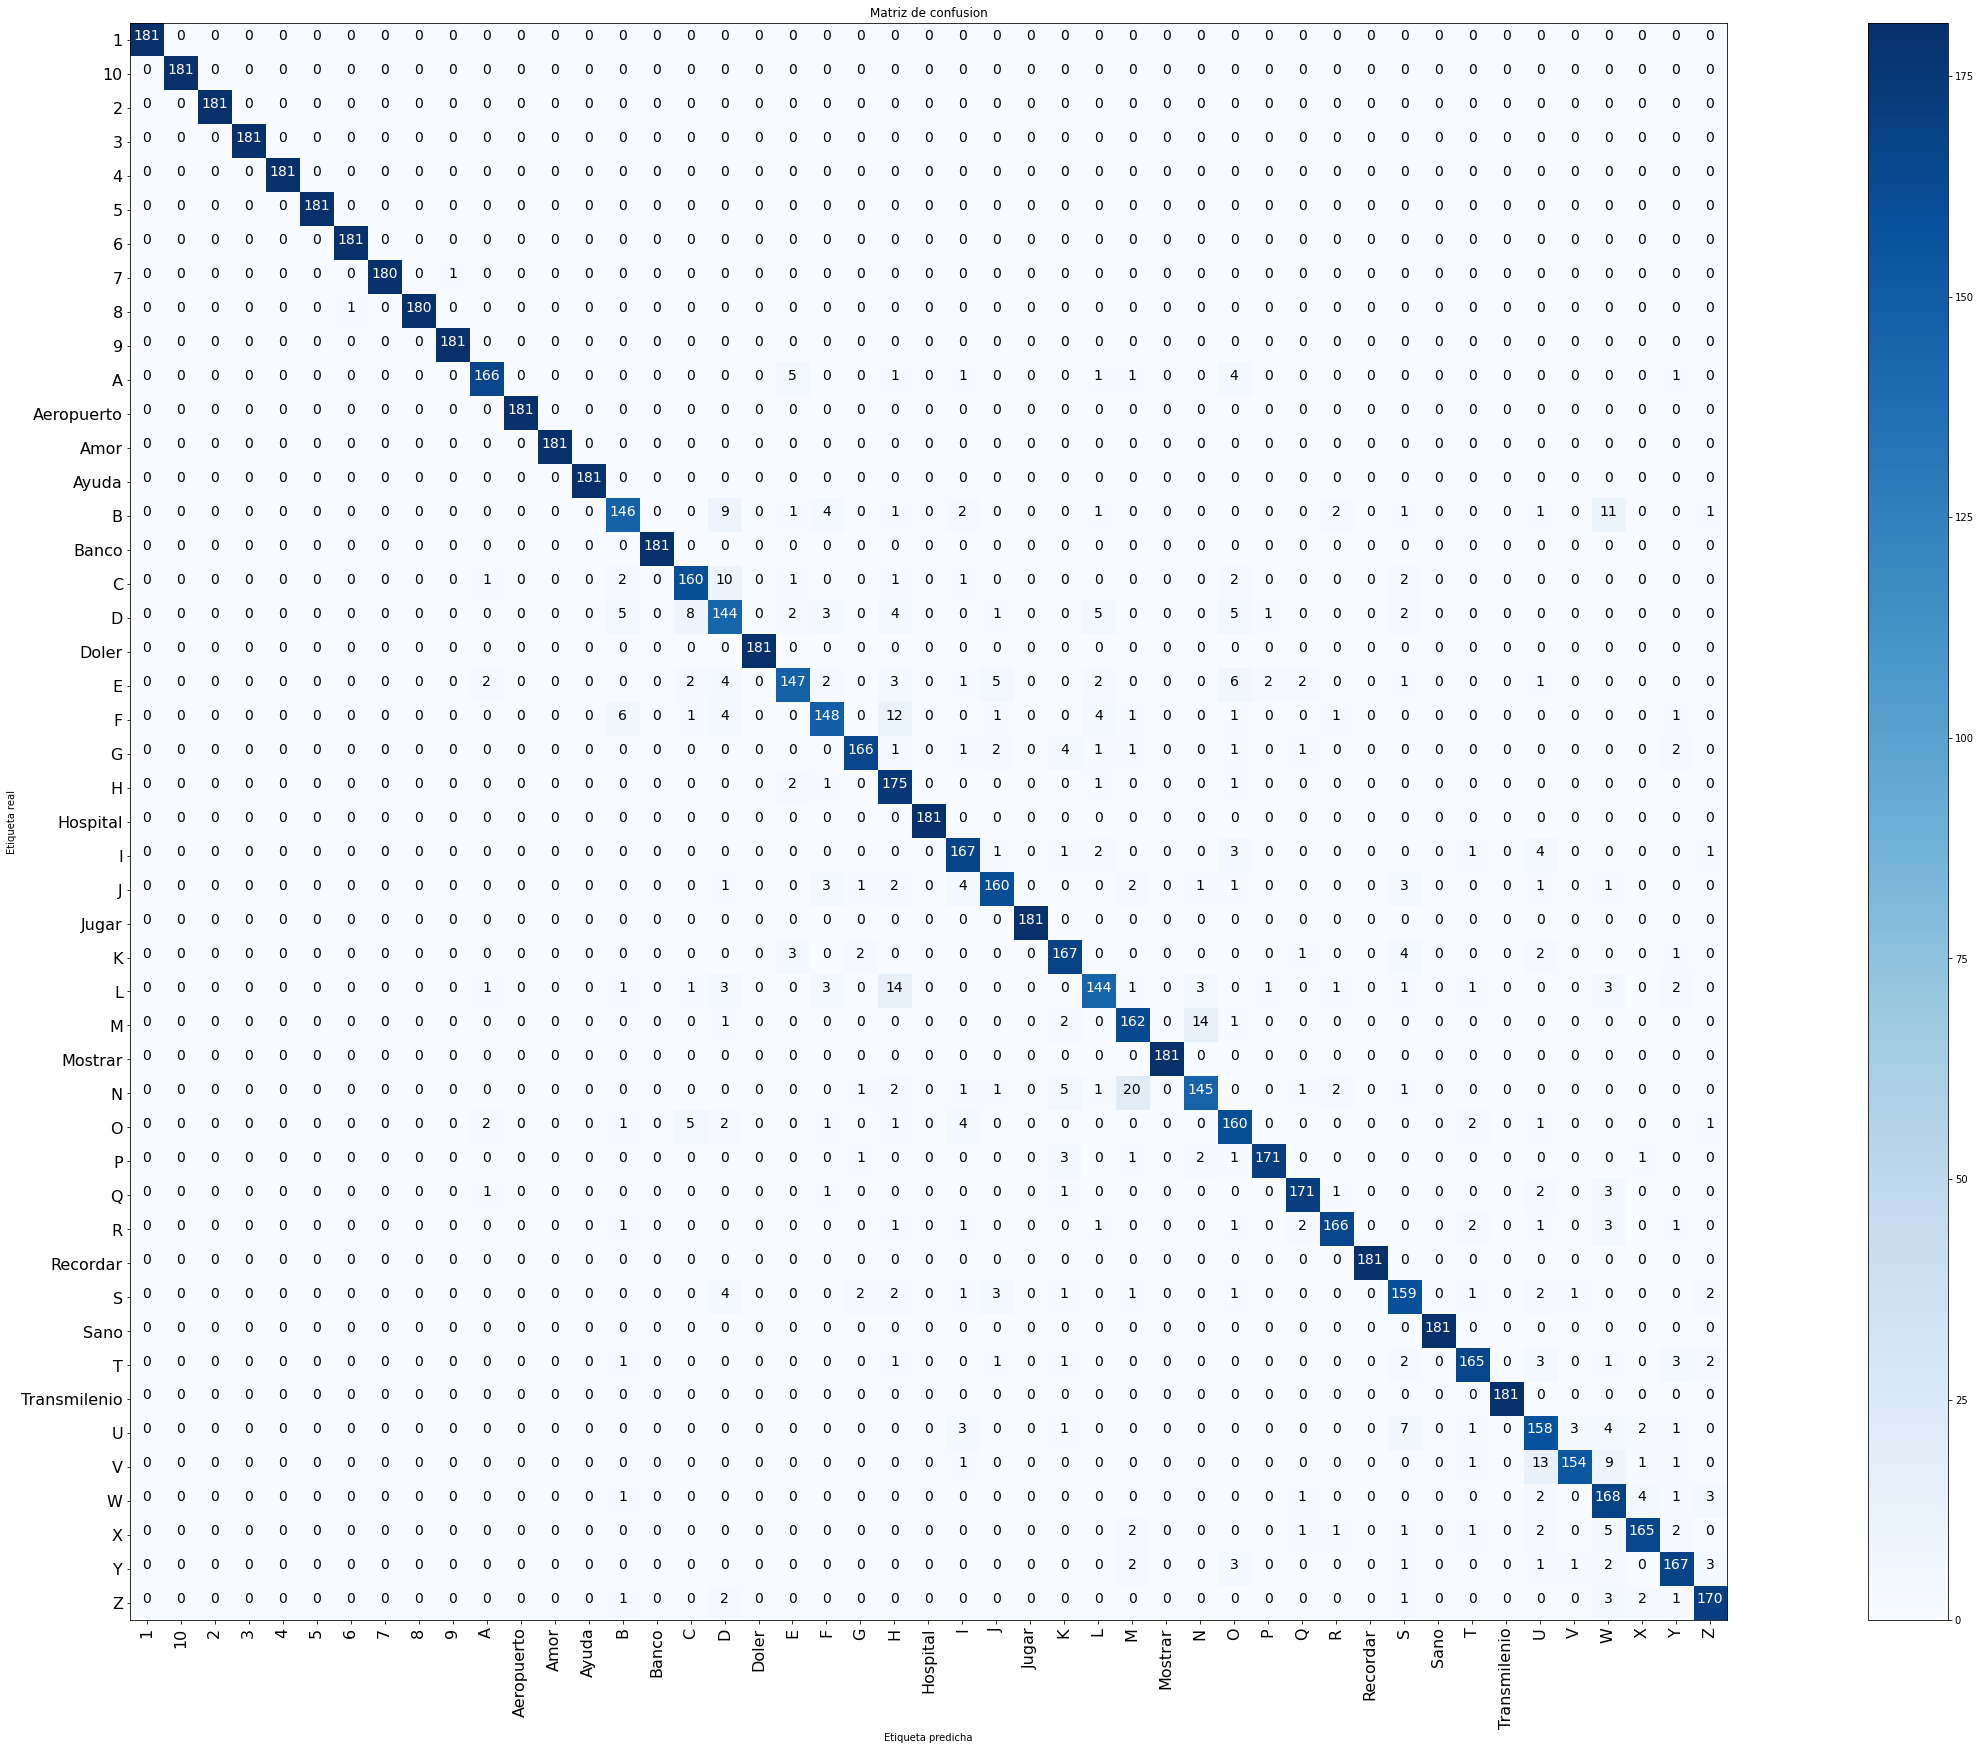

In [21]:
cnf_matrix = confusion_matrix(test_generator.classes, predicted_classes,
                              labels=[i for i in list(test_generator.class_indices.values())])
np.set_printoptions(precision=2)
plt.figure()
class_names = [i for i in list(test_generator.class_indices.keys())]
matriz_confusion(cnf_matrix,
                        classes=class_names,
                        title='Matriz de confusion')
a = plt.gcf()
a.set_size_inches(50,50)
plt.show()

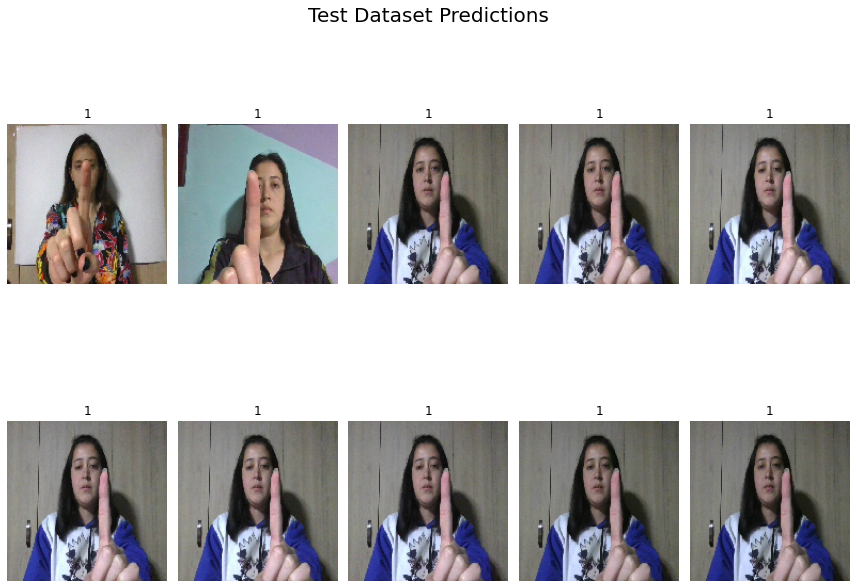

In [34]:
labels = {value: key for key, value in test_generator.class_indices.items()}
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(test_pred_prob[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

# Escala de Grises

Found 25380 images belonging to 47 classes.
Found 8460 images belonging to 47 classes.
Params_Model - Activación:relu cellsize:3 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 28s 519ms/step - loss: 0.1925 - acc: 0.0200 - precision: 0.0000e+00 - val_loss: 0.1137 - val_acc: 0.0370 - val_precision: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 21s 422ms/step - loss: 0.1117 - acc: 0.0200 - precision: 0.0000e+00 - val_loss: 0.1096 - val_acc: 0.0190 - val_precision: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 21s 412ms/step - loss: 0.1088 - acc: 0.0220 - precision: 0.0000e+00 - val_loss: 0.1070 - val_acc: 0.0200 - val_precision: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 21s 411ms/step - loss: 0.1066 - acc: 0.0250 - precision: 0.0000e+00 - val_loss: 0.1059 - val_acc: 0.0210 - val_precision: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 20s 399ms/step - loss: 0.1050 - acc: 0.0390 - precision: 0.0000e

Epoch 46/70
50/50 [==============================] - 19s 378ms/step - loss: 0.0386 - acc: 0.6730 - precision: 0.8672 - val_loss: 0.0412 - val_acc: 0.6340 - val_precision: 0.8609
Epoch 47/70
50/50 [==============================] - 20s 393ms/step - loss: 0.0351 - acc: 0.6950 - precision: 0.8978 - val_loss: 0.0413 - val_acc: 0.6360 - val_precision: 0.8377
Epoch 48/70
50/50 [==============================] - 19s 384ms/step - loss: 0.0343 - acc: 0.7030 - precision: 0.8808 - val_loss: 0.0379 - val_acc: 0.6860 - val_precision: 0.8782
Epoch 49/70
50/50 [==============================] - 19s 381ms/step - loss: 0.0370 - acc: 0.6940 - precision: 0.8889 - val_loss: 0.0390 - val_acc: 0.6660 - val_precision: 0.8622
Epoch 50/70
50/50 [==============================] - 19s 371ms/step - loss: 0.0328 - acc: 0.7200 - precision: 0.8956 - val_loss: 0.0355 - val_acc: 0.6970 - val_precision: 0.8889
Epoch 51/70
50/50 [==============================] - 19s 378ms/step - loss: 0.0340 - acc: 0.7110 - precision: 

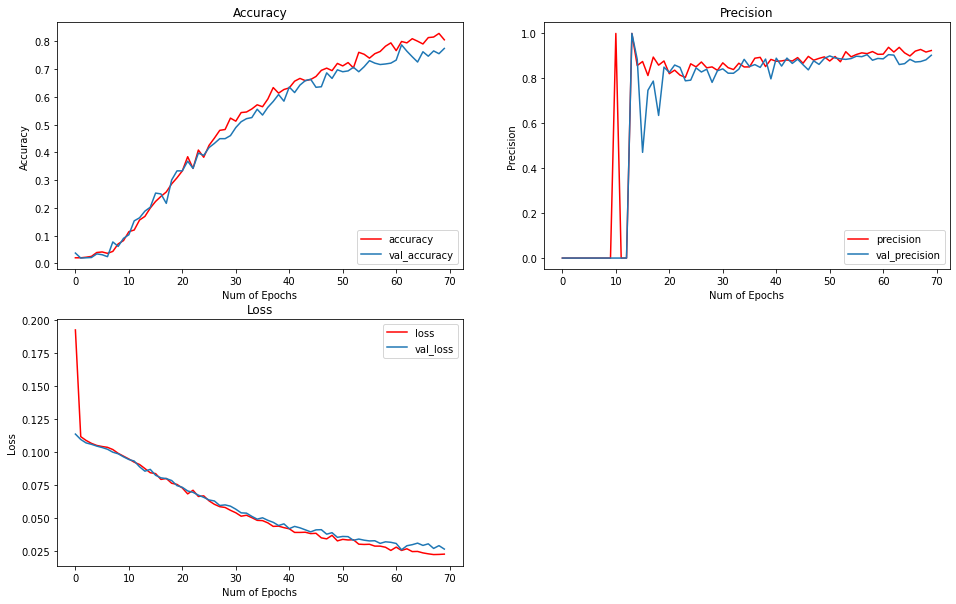

Tiempo en segundos entrenando:  1358.939508676529
Params_Model - Activación:relu cellsize:3 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 46s 320ms/step - loss: 0.1519 - acc: 0.0260 - precision_1: 0.0000e+00 - val_loss: 0.1097 - val_acc: 0.0240 - val_precision_1: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 32s 319ms/step - loss: 0.1077 - acc: 0.0250 - precision_1: 0.0000e+00 - val_loss: 0.1070 - val_acc: 0.0210 - val_precision_1: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 32s 316ms/step - loss: 0.1058 - acc: 0.0270 - precision_1: 0.0000e+00 - val_loss: 0.1039 - val_acc: 0.0270 - val_precision_1: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 32s 323ms/step - loss: 0.1040 - acc: 0.0340 - precision_1: 0.0000e+00 - val_loss: 0.1034 - val_acc: 0.0410 - val_precision_1: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 32s 324ms/step - loss: 0.1012 - acc: 0.0610 - precision_1: 0.0000e+00 - va

Epoch 45/70
100/100 [==============================] - 33s 334ms/step - loss: 0.0169 - acc: 0.8695 - precision_1: 0.9312 - val_loss: 0.0229 - val_acc: 0.8040 - val_precision_1: 0.9014
Epoch 46/70
100/100 [==============================] - 33s 327ms/step - loss: 0.0180 - acc: 0.8520 - precision_1: 0.9396 - val_loss: 0.0225 - val_acc: 0.8120 - val_precision_1: 0.9150
Epoch 47/70
100/100 [==============================] - 33s 327ms/step - loss: 0.0176 - acc: 0.8685 - precision_1: 0.9397 - val_loss: 0.0232 - val_acc: 0.8130 - val_precision_1: 0.9064
Epoch 48/70
100/100 [==============================] - 33s 325ms/step - loss: 0.0163 - acc: 0.8805 - precision_1: 0.9505 - val_loss: 0.0213 - val_acc: 0.8340 - val_precision_1: 0.9209
Epoch 49/70
100/100 [==============================] - 33s 326ms/step - loss: 0.0158 - acc: 0.8790 - precision_1: 0.9399 - val_loss: 0.0218 - val_acc: 0.8200 - val_precision_1: 0.9214
Epoch 50/70
100/100 [==============================] - 32s 318ms/step - loss: 0.

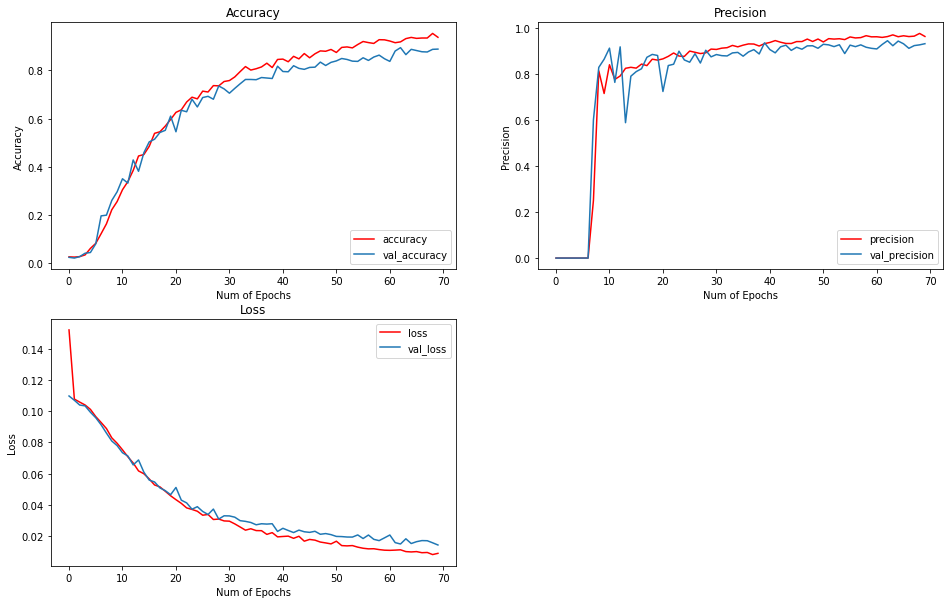

Tiempo en segundos entrenando:  2282.517633676529
Params_Model - Activación:relu cellsize:5 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 26s 483ms/step - loss: 0.1733 - acc: 0.0260 - precision_2: 0.0000e+00 - val_loss: 0.1143 - val_acc: 0.0230 - val_precision_2: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 24s 479ms/step - loss: 0.1143 - acc: 0.0310 - precision_2: 0.0000e+00 - val_loss: 0.1111 - val_acc: 0.0200 - val_precision_2: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 24s 481ms/step - loss: 0.1112 - acc: 0.0340 - precision_2: 0.0000e+00 - val_loss: 0.1131 - val_acc: 0.0340 - val_precision_2: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 24s 476ms/step - loss: 0.1096 - acc: 0.0220 - precision_2: 0.0000e+00 - val_loss: 0.1138 - val_acc: 0.0190 - val_precision_2: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 24s 477ms/step - loss: 0.1084 - acc: 0.0260 - precision_2: 0.0000e+00 - val_loss: 0.1

Epoch 45/70
50/50 [==============================] - 24s 471ms/step - loss: 0.0405 - acc: 0.6530 - precision_2: 0.8618 - val_loss: 0.0415 - val_acc: 0.6470 - val_precision_2: 0.8705
Epoch 46/70
50/50 [==============================] - 24s 480ms/step - loss: 0.0375 - acc: 0.6870 - precision_2: 0.8723 - val_loss: 0.0419 - val_acc: 0.6300 - val_precision_2: 0.8399
Epoch 47/70
50/50 [==============================] - 23s 463ms/step - loss: 0.0377 - acc: 0.6750 - precision_2: 0.8671 - val_loss: 0.0396 - val_acc: 0.6480 - val_precision_2: 0.8506
Epoch 48/70
50/50 [==============================] - 22s 437ms/step - loss: 0.0373 - acc: 0.6640 - precision_2: 0.8524 - val_loss: 0.0379 - val_acc: 0.6740 - val_precision_2: 0.8686
Epoch 49/70
50/50 [==============================] - 23s 469ms/step - loss: 0.0354 - acc: 0.7050 - precision_2: 0.8840 - val_loss: 0.0409 - val_acc: 0.6380 - val_precision_2: 0.8092
Epoch 50/70
50/50 [==============================] - 24s 477ms/step - loss: 0.0346 - acc: 

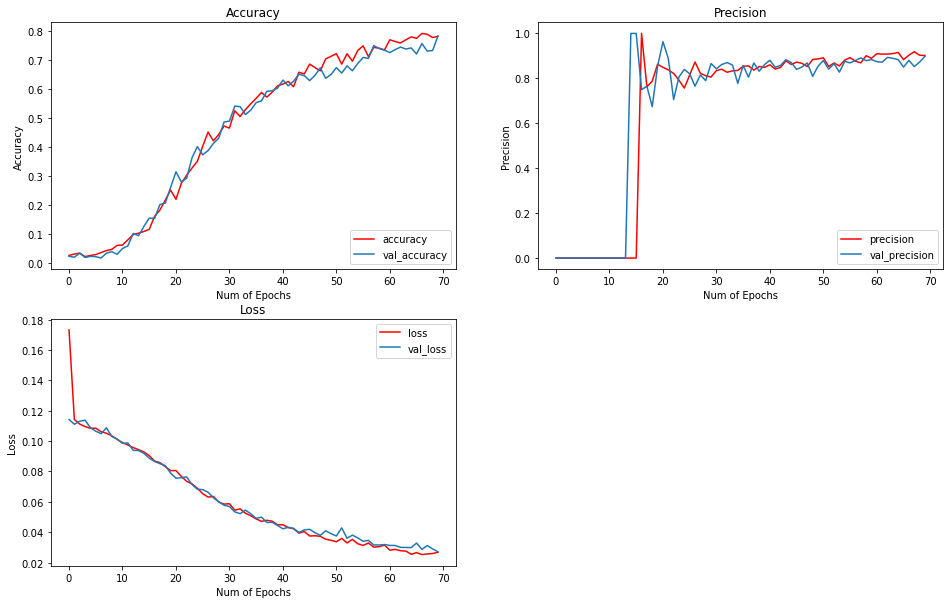

Tiempo en segundos entrenando:  1653.8679733276367
Params_Model - Activación:relu cellsize:5 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 43s 417ms/step - loss: 0.1401 - acc: 0.0285 - precision_3: 0.0000e+00 - val_loss: 0.1116 - val_acc: 0.0170 - val_precision_3: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 41s 413ms/step - loss: 0.1107 - acc: 0.0255 - precision_3: 0.0000e+00 - val_loss: 0.1071 - val_acc: 0.0300 - val_precision_3: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 40s 404ms/step - loss: 0.1073 - acc: 0.0260 - precision_3: 0.0000e+00 - val_loss: 0.1059 - val_acc: 0.0410 - val_precision_3: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 40s 397ms/step - loss: 0.1043 - acc: 0.0365 - precision_3: 0.0000e+00 - val_loss: 0.1043 - val_acc: 0.0380 - val_precision_3: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 40s 396ms/step - loss: 0.1003 - acc: 0.0510 - precision_3: 0.0000e+00 - v

Epoch 45/70
100/100 [==============================] - 41s 406ms/step - loss: 0.0166 - acc: 0.8745 - precision_3: 0.9401 - val_loss: 0.0218 - val_acc: 0.8280 - val_precision_3: 0.9026
Epoch 46/70
100/100 [==============================] - 41s 405ms/step - loss: 0.0167 - acc: 0.8700 - precision_3: 0.9386 - val_loss: 0.0229 - val_acc: 0.8090 - val_precision_3: 0.9003
Epoch 47/70
100/100 [==============================] - 46s 455ms/step - loss: 0.0168 - acc: 0.8690 - precision_3: 0.9401 - val_loss: 0.0216 - val_acc: 0.8290 - val_precision_3: 0.9141
Epoch 48/70
100/100 [==============================] - 40s 403ms/step - loss: 0.0153 - acc: 0.8850 - precision_3: 0.9513 - val_loss: 0.0210 - val_acc: 0.8260 - val_precision_3: 0.9163
Epoch 49/70
100/100 [==============================] - 41s 406ms/step - loss: 0.0158 - acc: 0.8835 - precision_3: 0.9422 - val_loss: 0.0204 - val_acc: 0.8420 - val_precision_3: 0.9290
Epoch 50/70
100/100 [==============================] - 41s 409ms/step - loss: 0.

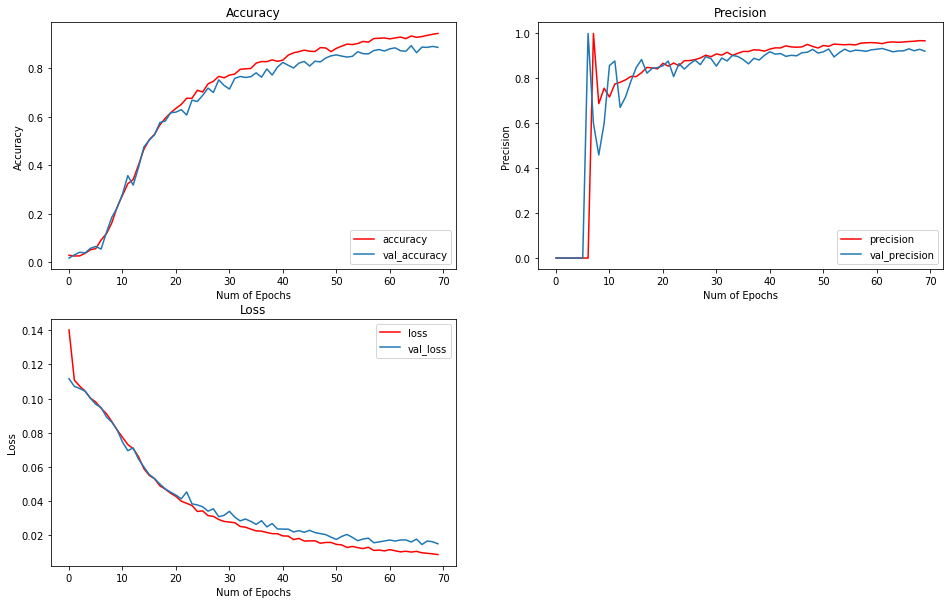

Tiempo en segundos entrenando:  2866.3007180690765
Params_Model - Activación:tanh cellsize:3 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 20s 379ms/step - loss: 0.1516 - acc: 0.0250 - precision_4: 0.0000e+00 - val_loss: 0.1105 - val_acc: 0.0260 - val_precision_4: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 18s 369ms/step - loss: 0.1063 - acc: 0.0180 - precision_4: 0.0000e+00 - val_loss: 0.1037 - val_acc: 0.0290 - val_precision_4: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 18s 368ms/step - loss: 0.1031 - acc: 0.0230 - precision_4: 0.0000e+00 - val_loss: 0.1024 - val_acc: 0.0340 - val_precision_4: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 19s 379ms/step - loss: 0.1021 - acc: 0.0300 - precision_4: 0.0000e+00 - val_loss: 0.1014 - val_acc: 0.0470 - val_precision_4: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 19s 383ms/step - loss: 0.1011 - acc: 0.0460 - precision_4: 0.0000e+00 - val_loss: 0.

Epoch 45/70
50/50 [==============================] - 19s 380ms/step - loss: 0.0394 - acc: 0.7200 - precision_4: 0.9841 - val_loss: 0.0421 - val_acc: 0.6760 - val_precision_4: 0.9657
Epoch 46/70
50/50 [==============================] - 19s 378ms/step - loss: 0.0400 - acc: 0.7140 - precision_4: 0.9819 - val_loss: 0.0386 - val_acc: 0.7240 - val_precision_4: 0.9887
Epoch 47/70
50/50 [==============================] - 20s 404ms/step - loss: 0.0378 - acc: 0.7280 - precision_4: 0.9923 - val_loss: 0.0391 - val_acc: 0.7040 - val_precision_4: 0.9885
Epoch 48/70
50/50 [==============================] - 20s 401ms/step - loss: 0.0369 - acc: 0.7500 - precision_4: 0.9925 - val_loss: 0.0389 - val_acc: 0.7060 - val_precision_4: 0.9884
Epoch 49/70
50/50 [==============================] - 20s 399ms/step - loss: 0.0355 - acc: 0.7560 - precision_4: 0.9820 - val_loss: 0.0403 - val_acc: 0.6820 - val_precision_4: 0.9900
Epoch 50/70
50/50 [==============================] - 20s 406ms/step - loss: 0.0365 - acc: 

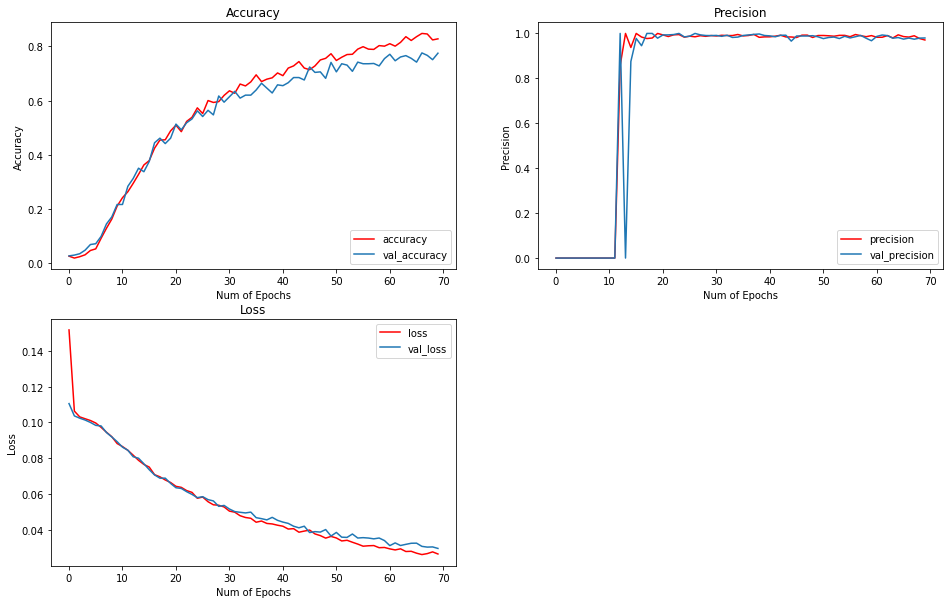

Tiempo en segundos entrenando:  1378.4497592449188
Params_Model - Activación:tanh cellsize:3 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 35s 333ms/step - loss: 0.1284 - acc: 0.0280 - precision_5: 0.0000e+00 - val_loss: 0.1035 - val_acc: 0.0320 - val_precision_5: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 33s 333ms/step - loss: 0.1024 - acc: 0.0340 - precision_5: 0.0000e+00 - val_loss: 0.1018 - val_acc: 0.0530 - val_precision_5: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 34s 343ms/step - loss: 0.0997 - acc: 0.0685 - precision_5: 0.0000e+00 - val_loss: 0.0981 - val_acc: 0.0900 - val_precision_5: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 34s 344ms/step - loss: 0.0955 - acc: 0.1110 - precision_5: 0.0000e+00 - val_loss: 0.0945 - val_acc: 0.1210 - val_precision_5: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 33s 326ms/step - loss: 0.0903 - acc: 0.1780 - precision_5: 0.0000e+00 - v

Epoch 45/70
100/100 [==============================] - 31s 312ms/step - loss: 0.0186 - acc: 0.8970 - precision_5: 0.9875 - val_loss: 0.0234 - val_acc: 0.8350 - val_precision_5: 0.9678
Epoch 46/70
100/100 [==============================] - 31s 313ms/step - loss: 0.0178 - acc: 0.9045 - precision_5: 0.9826 - val_loss: 0.0239 - val_acc: 0.8240 - val_precision_5: 0.9720
Epoch 47/70
100/100 [==============================] - 31s 313ms/step - loss: 0.0176 - acc: 0.9060 - precision_5: 0.9891 - val_loss: 0.0219 - val_acc: 0.8440 - val_precision_5: 0.9779
Epoch 48/70
100/100 [==============================] - 31s 312ms/step - loss: 0.0174 - acc: 0.9065 - precision_5: 0.9824 - val_loss: 0.0219 - val_acc: 0.8450 - val_precision_5: 0.9640
Epoch 49/70
100/100 [==============================] - 31s 315ms/step - loss: 0.0165 - acc: 0.9200 - precision_5: 0.9835 - val_loss: 0.0218 - val_acc: 0.8530 - val_precision_5: 0.9626
Epoch 50/70
100/100 [==============================] - 32s 315ms/step - loss: 0.

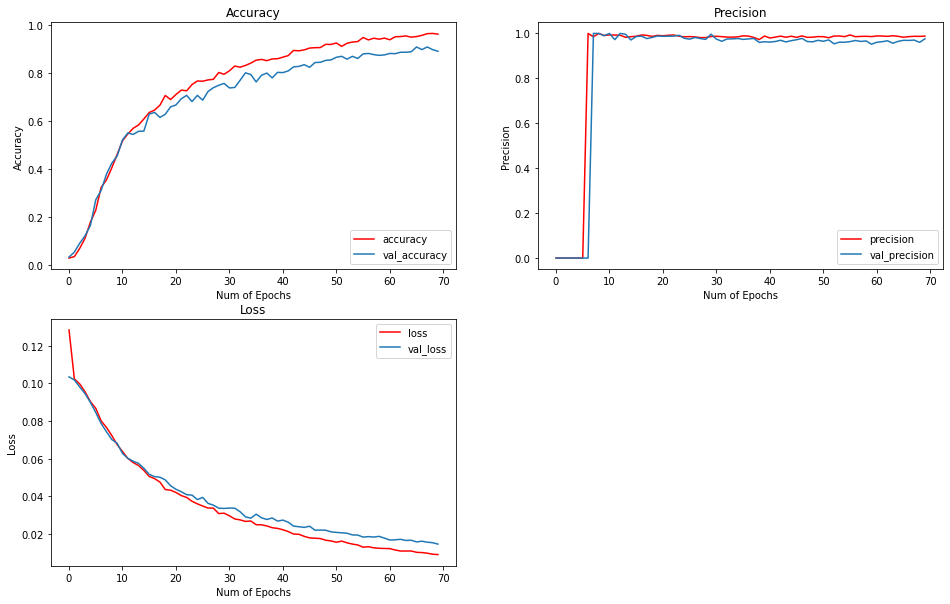

Tiempo en segundos entrenando:  2276.598762512207
Params_Model - Activación:tanh cellsize:5 steps_epoch:50
Epoch 1/70
50/50 [==============================] - 25s 486ms/step - loss: 0.1627 - acc: 0.0200 - precision_6: 0.0000e+00 - val_loss: 0.1131 - val_acc: 0.0400 - val_precision_6: 0.0000e+00
Epoch 2/70
50/50 [==============================] - 25s 492ms/step - loss: 0.1076 - acc: 0.0290 - precision_6: 0.0000e+00 - val_loss: 0.1046 - val_acc: 0.0130 - val_precision_6: 0.0000e+00
Epoch 3/70
50/50 [==============================] - 25s 493ms/step - loss: 0.1038 - acc: 0.0280 - precision_6: 0.0000e+00 - val_loss: 0.1033 - val_acc: 0.0230 - val_precision_6: 0.0000e+00
Epoch 4/70
50/50 [==============================] - 24s 488ms/step - loss: 0.1031 - acc: 0.0290 - precision_6: 0.0000e+00 - val_loss: 0.1035 - val_acc: 0.0160 - val_precision_6: 0.0000e+00
Epoch 5/70
50/50 [==============================] - 25s 494ms/step - loss: 0.1028 - acc: 0.0220 - precision_6: 0.0000e+00 - val_loss: 0.1

Epoch 45/70
50/50 [==============================] - 24s 482ms/step - loss: 0.0407 - acc: 0.7160 - precision_6: 0.9851 - val_loss: 0.0427 - val_acc: 0.6740 - val_precision_6: 0.9873
Epoch 46/70
50/50 [==============================] - 25s 503ms/step - loss: 0.0399 - acc: 0.7310 - precision_6: 0.9921 - val_loss: 0.0431 - val_acc: 0.6720 - val_precision_6: 0.9914
Epoch 47/70
50/50 [==============================] - 25s 498ms/step - loss: 0.0388 - acc: 0.7340 - precision_6: 0.9843 - val_loss: 0.0448 - val_acc: 0.6480 - val_precision_6: 0.9740
Epoch 48/70
50/50 [==============================] - 25s 495ms/step - loss: 0.0379 - acc: 0.7360 - precision_6: 0.9866 - val_loss: 0.0438 - val_acc: 0.6520 - val_precision_6: 0.9781
Epoch 49/70
50/50 [==============================] - 25s 493ms/step - loss: 0.0401 - acc: 0.7170 - precision_6: 0.9874 - val_loss: 0.0405 - val_acc: 0.6910 - val_precision_6: 0.9839
Epoch 50/70
50/50 [==============================] - 25s 495ms/step - loss: 0.0359 - acc: 

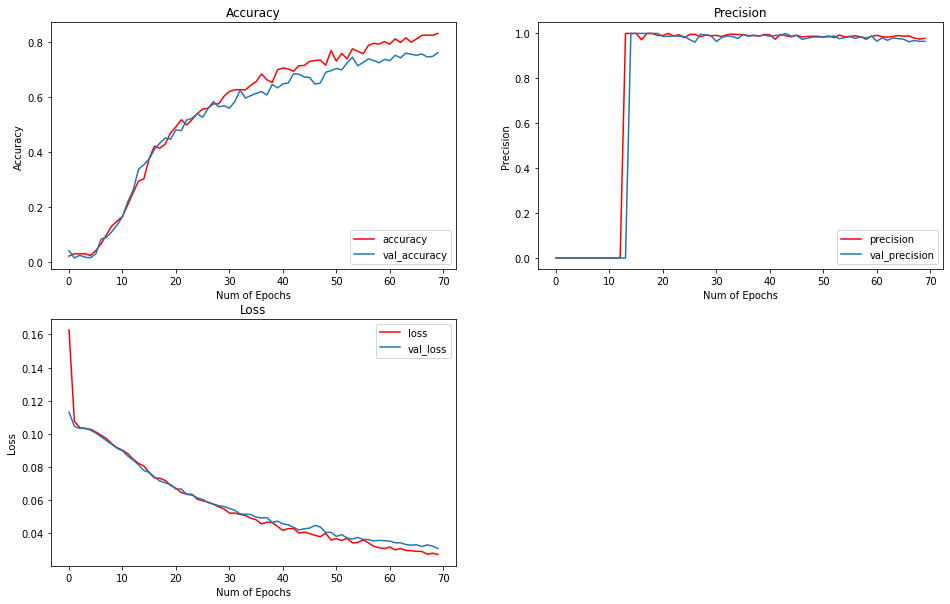

Tiempo en segundos entrenando:  1727.229285478592
Params_Model - Activación:tanh cellsize:5 steps_epoch:100
Epoch 1/70
100/100 [==============================] - 43s 415ms/step - loss: 0.1366 - acc: 0.0220 - precision_7: 0.0000e+00 - val_loss: 0.1046 - val_acc: 0.0220 - val_precision_7: 0.0000e+00
Epoch 2/70
100/100 [==============================] - 41s 408ms/step - loss: 0.1035 - acc: 0.0185 - precision_7: 0.0000e+00 - val_loss: 0.1035 - val_acc: 0.0320 - val_precision_7: 0.0000e+00
Epoch 3/70
100/100 [==============================] - 45s 452ms/step - loss: 0.1025 - acc: 0.0290 - precision_7: 0.0000e+00 - val_loss: 0.1011 - val_acc: 0.0540 - val_precision_7: 0.0000e+00
Epoch 4/70
100/100 [==============================] - 43s 432ms/step - loss: 0.0994 - acc: 0.0770 - precision_7: 0.0000e+00 - val_loss: 0.0973 - val_acc: 0.1200 - val_precision_7: 0.0000e+00
Epoch 5/70
100/100 [==============================] - 43s 435ms/step - loss: 0.0949 - acc: 0.1355 - precision_7: 0.0000e+00 - va

Epoch 45/70
100/100 [==============================] - 44s 435ms/step - loss: 0.0189 - acc: 0.8960 - precision_7: 0.9828 - val_loss: 0.0224 - val_acc: 0.8590 - val_precision_7: 0.9746
Epoch 46/70
100/100 [==============================] - 43s 434ms/step - loss: 0.0184 - acc: 0.8975 - precision_7: 0.9818 - val_loss: 0.0235 - val_acc: 0.8480 - val_precision_7: 0.9562
Epoch 47/70
100/100 [==============================] - 40s 398ms/step - loss: 0.0180 - acc: 0.9055 - precision_7: 0.9814 - val_loss: 0.0230 - val_acc: 0.8390 - val_precision_7: 0.9620
Epoch 48/70
100/100 [==============================] - 44s 444ms/step - loss: 0.0166 - acc: 0.9160 - precision_7: 0.9806 - val_loss: 0.0207 - val_acc: 0.8600 - val_precision_7: 0.9726
Epoch 49/70
100/100 [==============================] - 44s 437ms/step - loss: 0.0164 - acc: 0.9070 - precision_7: 0.9842 - val_loss: 0.0205 - val_acc: 0.8660 - val_precision_7: 0.9608
Epoch 50/70
100/100 [==============================] - 42s 419ms/step - loss: 0.

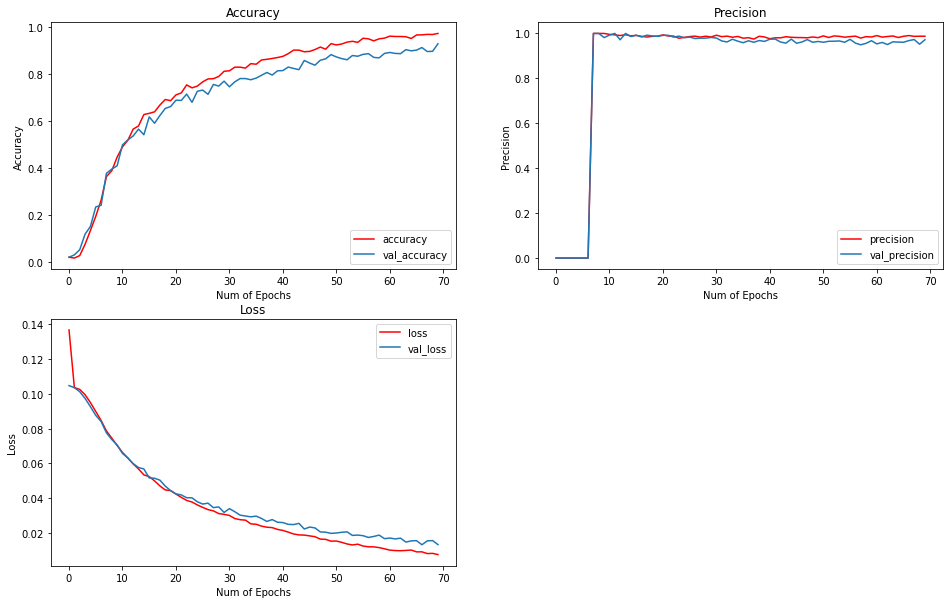

Tiempo en segundos entrenando:  3010.751230239868


In [35]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import xlwt
import json
import time

workbook = xlwt.Workbook()   
sheet = workbook.add_sheet("Busqueda_En_Grilla")
style = xlwt.easyxf('font: bold 1')
sheet.write(0, 0, 'MODEL_ID', style)
sheet.write(0, 1, 'AUTOENCODER_SUMMARY', style)
sheet.write(0, 2, 'Params', style)
sheet.write(0, 3, 'Metrics', style)

#[3,5]
#[10, 20, 30]
#['relu', 'tanh']
cellsizes = [3,5]
activations = ['relu', 'tanh']
steps_epochs = [50,100]

train_dir= r"C:\Users\linar\Documents\Tesis\Dataset\datos\train"
validation_dir=r"C:\Users\linar\Documents\Tesis\Dataset\datos\validation"

# Todas las imágenes serán reescaladas por 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Este es el directorio de destino
        train_dir,
        # Todas las imágenes cambiarán de tamaño a 150 x 150.
        target_size=(150, 150),
        color_mode="grayscale",
        batch_size=20,
        # Dado que usamos la pérdida binary_crossentropy, necesitamos etiquetas binarias
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode="grayscale",
        batch_size=20,
        class_mode='categorical')
model_id = 1
for activation in activations:
    for cellsize in cellsizes:
        for steps_epoch in steps_epochs:
            params = 'Params_Model - Activación:' + str(activation) + ' cellsize:' + str(cellsize) + ' steps_epoch:' + str(steps_epoch)
            print(params)
            inicio = time.time()
            model = models.Sequential()
            model.add(layers.Conv2D(32, (cellsize, cellsize), activation=activation, input_shape=(150, 150, 1)))
            model.add(layers.MaxPooling2D((2, 2)))
            model.add(layers.Conv2D(64, (cellsize, cellsize), activation=activation))
            model.add(layers.MaxPooling2D((2, 2)))
            model.add(layers.Conv2D(128, (cellsize, cellsize), activation=activation))
            model.add(layers.MaxPooling2D((2, 2)))
            model.add(layers.Conv2D(128, (cellsize, cellsize), activation=activation))
            model.add(layers.MaxPooling2D((2, 2)))
            
            model.add(layers.Flatten())
            model.add(layers.Dense(512, activation=activation))
            model.add(layers.Dense(256, activation=activation))
            model.add(layers.Dense(47, activation='softmax'))
            prec =tf.keras.metrics.Precision()
            model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc',prec])
            history = model.fit(
                  train_generator,
                  steps_per_epoch=steps_epoch,
                  epochs=70,
                  validation_data=validation_generator,
                  validation_steps=50)
            stringlist = []
            model.summary(print_fn=lambda x: stringlist.append(x))
            short_model_summary = "\n".join(stringlist)
            sheet.write(model_id, 0, model_id)
            sheet.write(model_id, 1, short_model_summary)
            sheet.write(model_id, 2, params)
            model.save('./models/Lenguaje_'+ str(model_id) +'bn'+ '.h5')
            sheet.write(model_id, 3, json.dumps(history.history))
            a = history.history['acc']
            b = history.history['val_acc']
            
            diferencia = [abs(e1 - e2) for e1, e2 in zip(a,b)]
            producto = [e1 * e2 for e1, e2 in zip(b,diferencia)]
            
            sheet.write(model_id, 4, json.dumps(diferencia))
            sheet.write(model_id, 5, json.dumps(producto))
            sheet.write(model_id, 6, json.dumps(b))
            tmp = min(producto)
            best_epoc = producto.index(tmp) + 1
            print(best_epoc)
            sheet.write(model_id, 7, best_epoc)
            grafica(history)
            workbook.save("Busqueda_En_Grilla_Lenguaje_bn.xls")
            fin = time.time()
            print("Tiempo en segundos entrenando: ", fin-inicio)
            model_id += 1

# Matriz de confusión del modelo 8

In [35]:
new_model_bn = keras.models.load_model('.\models\Lenguaje_8bn.h5')

In [36]:
test_dir=r"C:\Users\linar\Documents\Tesis\Dataset\datos\test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode="grayscale",
        batch_size=20,
        shuffle=False,
        class_mode='categorical')


for data_batch, labels_batch in test_generator:
    print('Forma del lote de datos:', data_batch.shape)
    print('Forma del lote de etiquetas:', labels_batch.shape)
    break

Found 8481 images belonging to 47 classes.
Forma del lote de datos: (20, 150, 150, 1)
Forma del lote de etiquetas: (20, 47)


In [37]:
test_loss, test_accuracy, test_precision = new_model_bn.evaluate(test_generator)

425/425 [==============================] - 56s 131ms/step - loss: 0.0141 - acc: 0.9150 - precision_7: 0.9606


In [47]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Accuracy: {test_precision}")

Test Loss:     0.014138436876237392
Test Accuracy: 0.9149864315986633
Test Accuracy: 0.9605619311332703


In [38]:
predicted_classes = np.argmax(test_pred_prob, axis=1)
predicted_classes

array([ 0,  0,  0, ..., 46, 46, 46], dtype=int64)

In [39]:
test_pred_prob=new_model_bn.predict(test_generator)

425/425 [==============================] - 54s 127ms/step


In [42]:
predicted_classes = np.argmax(test_pred_prob, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

In [43]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       181
          10       0.99      1.00      1.00       181
           2       1.00      1.00      1.00       181
           3       0.97      1.00      0.99       181
           4       0.99      0.97      0.98       181
           5       0.99      1.00      0.99       181
           6       1.00      1.00      1.00       181
           7       0.99      0.99      0.99       181
           8       0.99      1.00      1.00       181
           9       1.00      0.99      0.99       181
           A       0.91      0.93      0.92       180
  Aeropuerto       1.00      1.00      1.00       181
        Amor       1.00      1.00      1.00       181
       Ayuda       1.00      1.00      1.00       181
           B       0.72      0.84      0.77       180
       Banco       1.00      1.00      1.00       181
           C       0.81      0.90      0.85       180
           D       0.79    

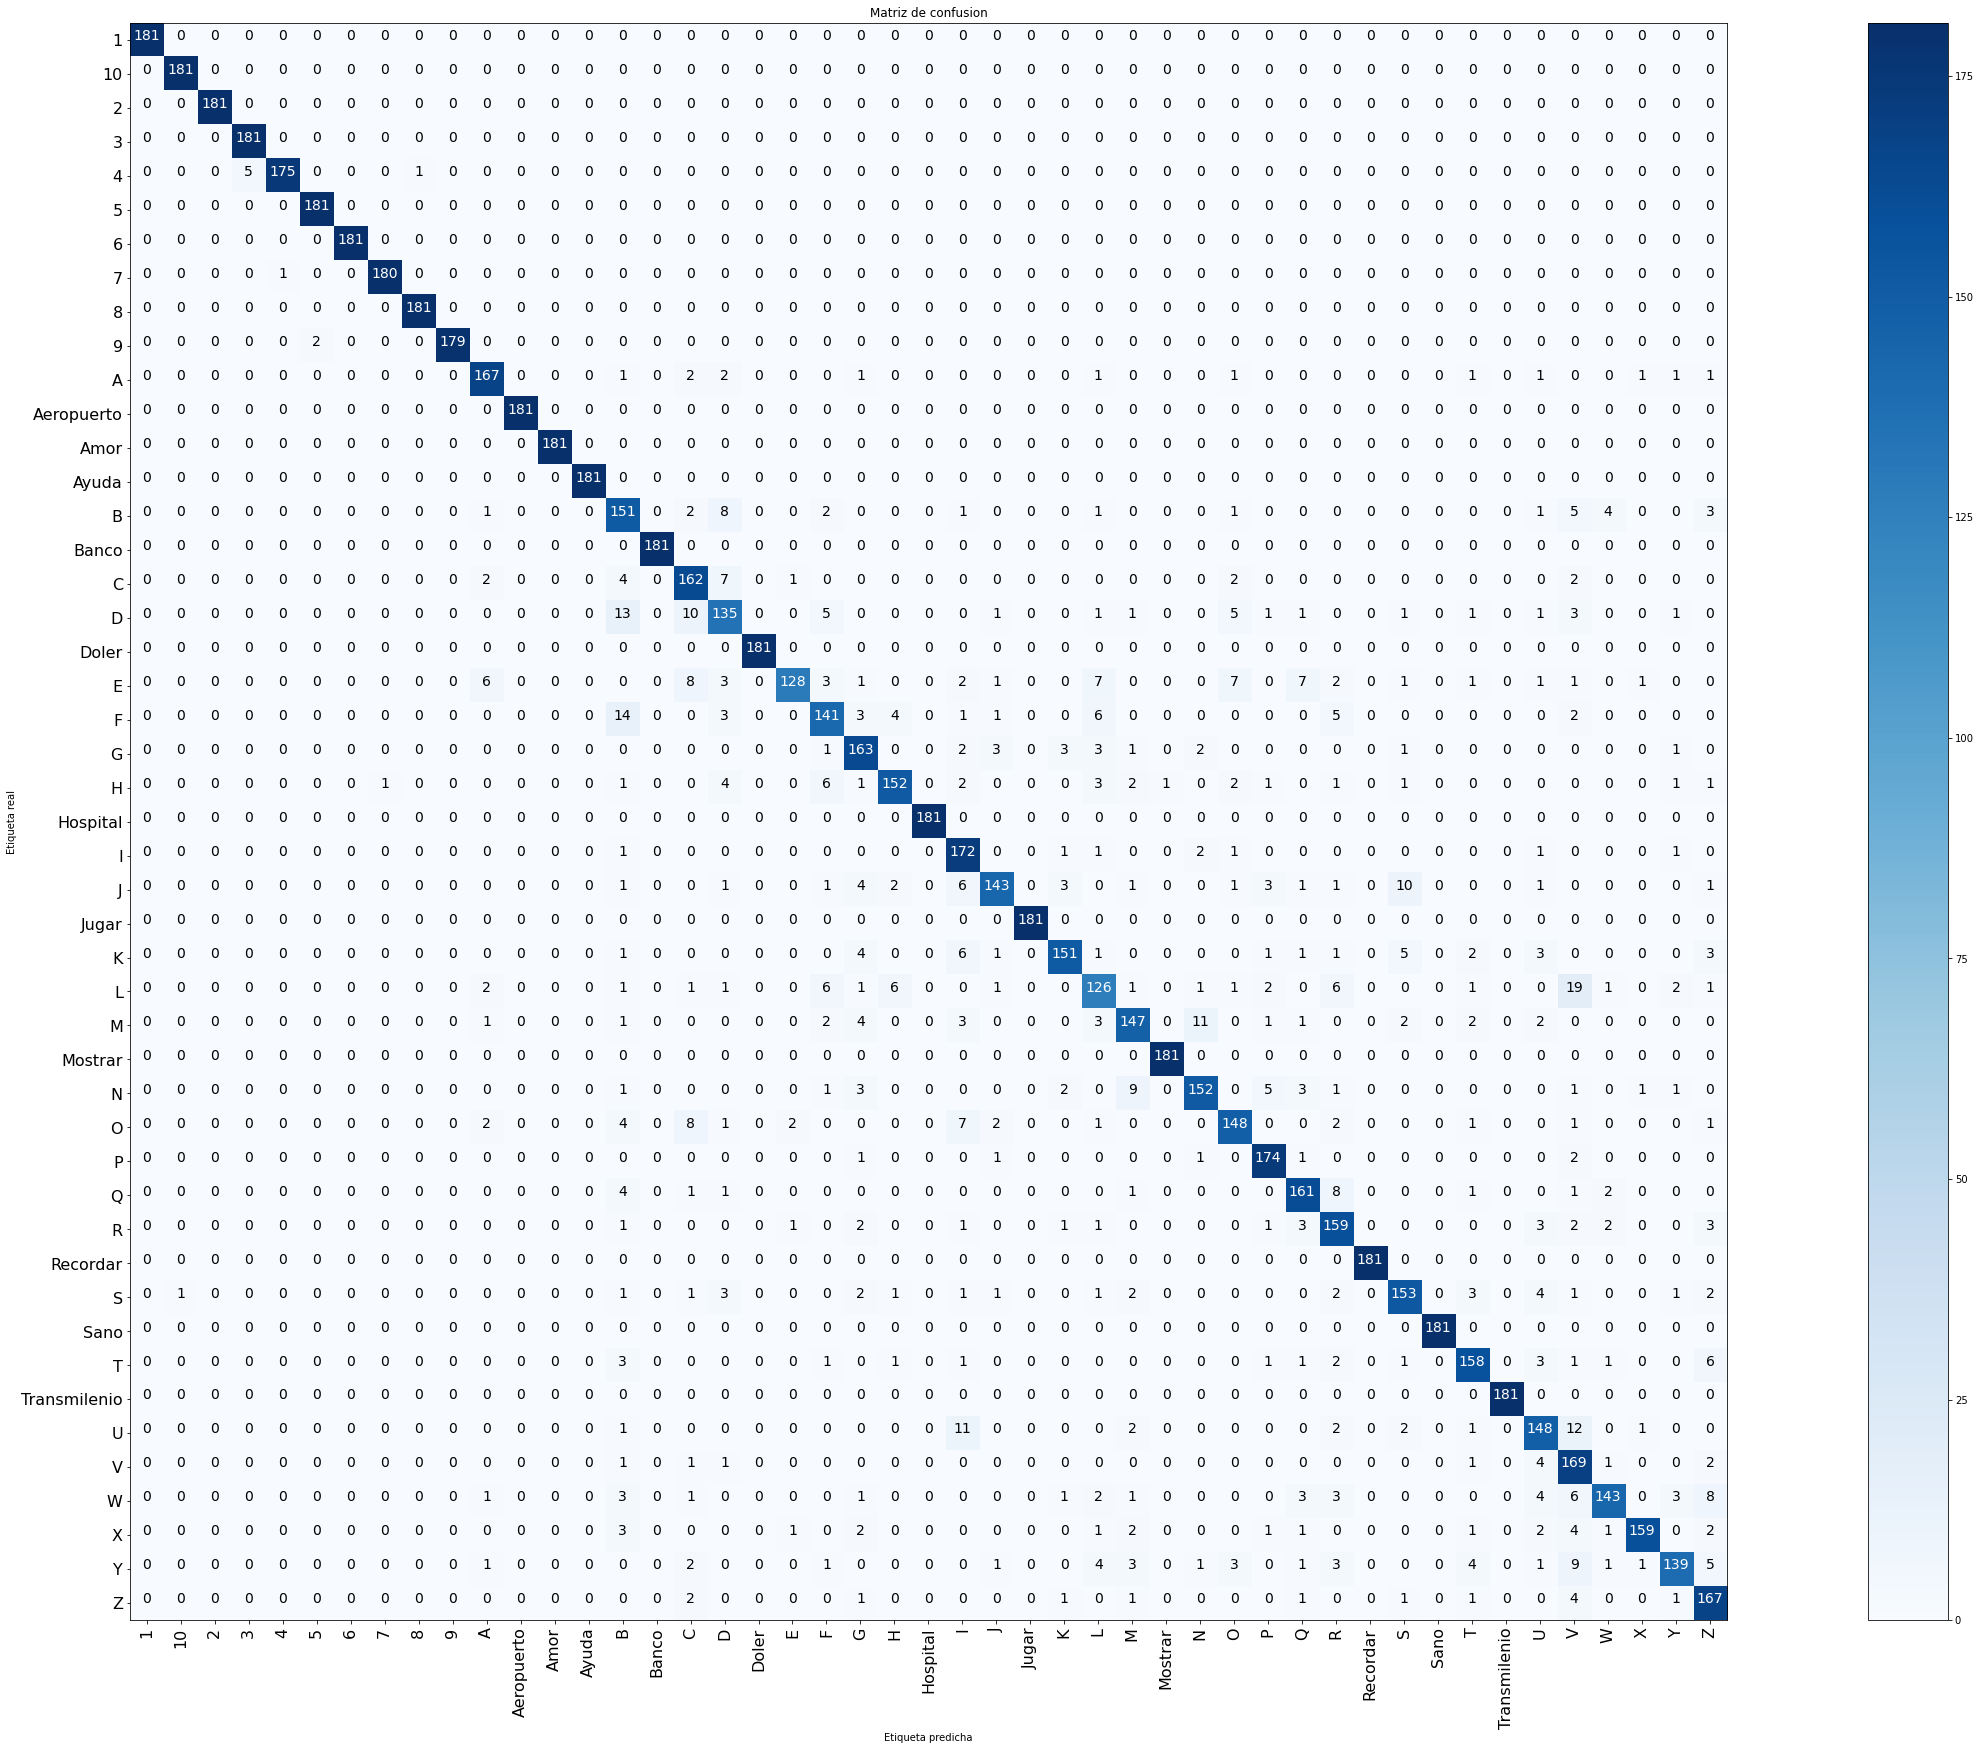

In [46]:
cnf_matrix = confusion_matrix(test_generator.classes, predicted_classes,
                              labels=[i for i in list(test_generator.class_indices.values())])
np.set_printoptions(precision=2)
plt.figure()
class_names = [i for i in list(test_generator.class_indices.keys())]
matriz_confusion(cnf_matrix,
                        classes=class_names,
                        title='Matriz de confusion')
a = plt.gcf()
a.set_size_inches(50,50)
plt.show()


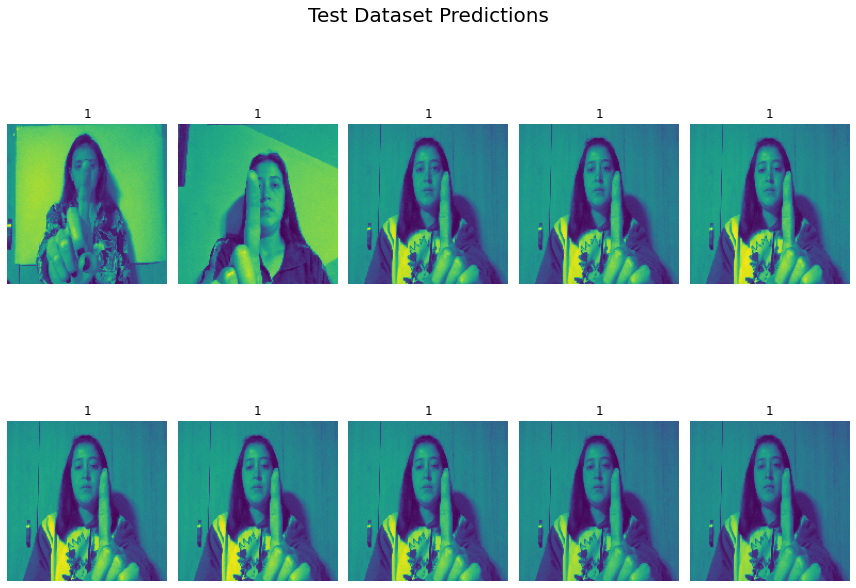

In [45]:
labels = {value: key for key, value in test_generator.class_indices.items()}
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(test_pred_prob[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()